## Import Lib

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Load Image

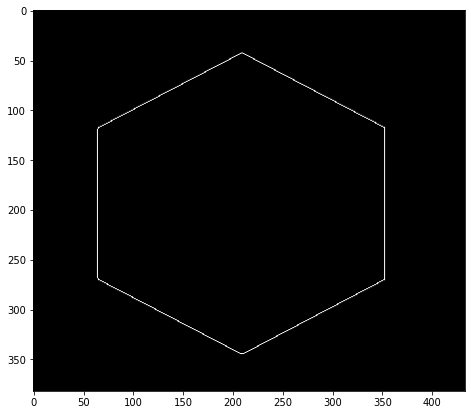

In [2]:
src = cv.imread("./six.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY) ## ปรับภาพให้เป็นสี ขาวเทา 
canny_image = cv.Canny(gray_img, 50, 150)  
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(canny_image,cmap='gray')
plt.show()

## Contour Finding

[array([[[209,  42]],

       [[208,  43]],

       [[207,  43]],

       ...,

       [[212,  44]],

       [[211,  43]],

       [[210,  43]]], dtype=int32)]


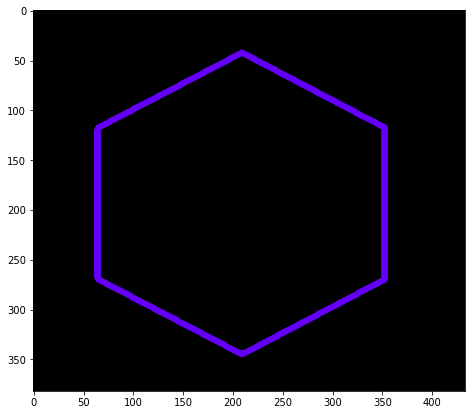

In [3]:
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) ## ส่งค่ามาเป็น hierarchy ชั้นๆ
edge_img = canny_image.copy()
print(contours)  ## วาด Contours
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) ## สร้างภาพเปล่า เพื่อวาด Contour ที่หาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB) 
cv.drawContours(drawn_contour_img, contours, -1, (100,0,250), 5 ) ## -1 คือ วาดทุกอั // ถ้าวาดบางอันสามารถใส่เลข index ของ Contour ที่จะวาดเลย 5 คือ เพิ่ม . ที่เป็นขอบ
plt.imshow(drawn_contour_img)
plt.show()

## Polygon Approximation 

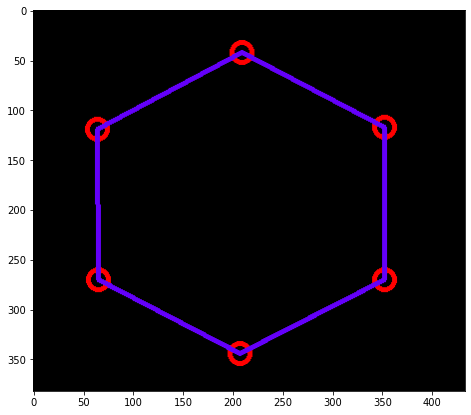

In [4]:
contours_approx = [] ## สร้าง array เอาไว้รับ สำหรับหลายอัน

for i,value in enumerate(contours): ## วนลูปวาดจุดต่อกัน
    contours_approx.append( cv.approxPolyDP(contours[i],0.01*cv.arcLength(contours[i],True),True) ) ## หาค่าส่วนโค้ง

## วาด Contours
drawn_approx_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) ## สร้างภาพเปล่า เพื่อวาด Contour ที่หาได้
drawn_approx_contour_img = cv.cvtColor(drawn_approx_contour_img,cv.COLOR_GRAY2RGB) 

## สร้างจุดเป็นตำแหน่งมุม
for i,values in enumerate(contours_approx):
    for j,dot in enumerate(values):
        drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, dot[0], 10, (255,0,0), 4) ## สร้างจุดเป็นวงกลม รอบตำแหน่งจุดมุม 10 วาดขนาดวงกลม 4 วาดขอบวงกลม

## ลากเส้นระหว่างจุด
cv.drawContours(drawn_approx_contour_img, contours_approx, -1, (100,0,250), 3) ## -1 คือ วาดทุกอั // ถ้าวาดบางอันสามารถใส่เลข index ของ Contour ที่จะวาดเลย 3 คือ เพิ่ม . ที่เป็นขอบ

plt.imshow(drawn_approx_contour_img)
plt.show()

## Moment or Centroid

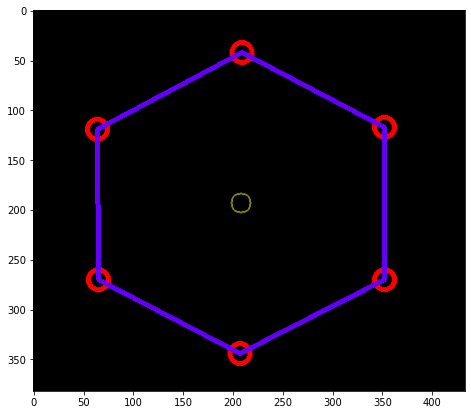

In [5]:
M = cv.moments(contours[0]) ## get moment
cx = int(M['m10']/M['m00']) ## get centroid x
cy = int(M['m01']/M['m00']) ## get centroid y

## หาจุดดศูนย์ถ่วงของภาพ
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, (cx,cy), 10, (255,255,20), 1) ## วงกลมสีเหลือง 
plt.imshow(drawn_approx_contour_img)
plt.show()

## Rectangle Boundary

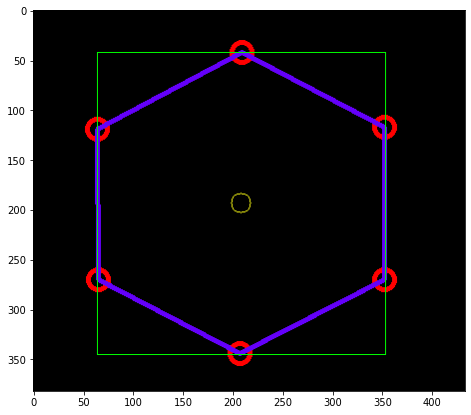

In [6]:
## สร้างสี่เหลี่ยมไว้คุมวัตถุที่ขนาดพอดีกับวัตถุ
x,y,w,h = cv.boundingRect(contours[0])
cv.rectangle(drawn_approx_contour_img,(x,y),(x+w,y+h),(0,255,0),1) ## สมการหามุมที่กรอบสี่เหลี่ยมครอบ

plt.imshow(drawn_approx_contour_img)
plt.show()

## Center 

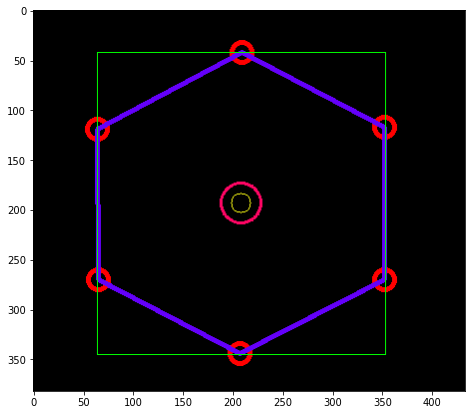

In [7]:
## หาจุดกลางของวัตถุ
center = [x+(w//2), y+(h//2)] ## สมการหาจุดกึ่งกลางของวัตถุ
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, center, 20, (255,5,100), 2) # หาจุดกึ่งกลาง เป็นสีชมพู

plt.imshow(drawn_approx_contour_img)
plt.show()

## Rotated Rect

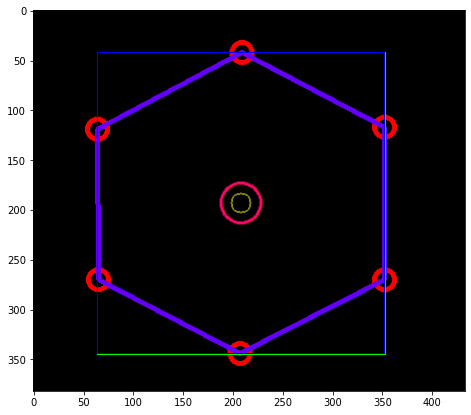

In [8]:
rect = cv.minAreaRect(contours[0])
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(drawn_approx_contour_img,[box],0,(0,0,255), 1) # สีน้ำเงิน ซ้อนกับสีเขียว
plt.imshow(drawn_approx_contour_img)
plt.show()

## Min Circle

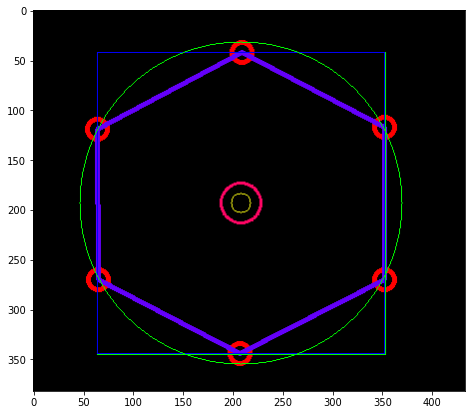

In [9]:
(x,y),radius = cv.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv.circle(drawn_approx_contour_img,center,radius,(0,255,0),1) # สีเขียวหนา
plt.imshow(drawn_approx_contour_img)
plt.show()

## Min Ellipse

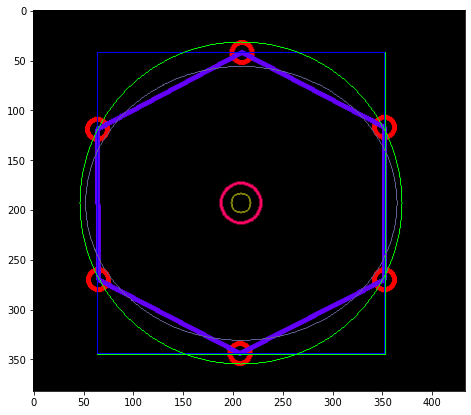

In [10]:
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(drawn_approx_contour_img,ellipse,(100,100,150),1) # สีเทา
plt.imshow(drawn_approx_contour_img)
plt.show()